Para encontrar textos similares a un texto base utilizando Machine Learning en Python, una técnica común es el modelado de temas o Topic Modeling. El modelado de temas es una técnica de procesamiento de lenguaje natural que permite identificar temas latentes o subyacentes en un corpus de documentos.

Para implementar esta técnica, se pueden utilizar bibliotecas de Python como Gensim o Scikit-Learn. A continuación, se describen los pasos generales para realizar el modelado de temas y encontrar textos similares:

Preprocesamiento de datos: antes de realizar el modelado de temas, se debe realizar un preprocesamiento de los datos, lo cual incluye la limpieza de texto, la eliminación de palabras irrelevantes (stopwords), la lematización o el stemming, entre otros pasos.

Creación del modelo de temas: una vez que se ha preprocesado el texto, se puede utilizar una técnica de modelado de temas como Latent Dirichlet Allocation (LDA) para identificar los temas latentes en el corpus. El número de temas que se desea identificar se puede especificar como un parámetro en la creación del modelo.

Encontrar documentos similares: después de haber creado el modelo de temas, se puede utilizar la técnica de similitud de coseno para encontrar documentos similares. La similitud de coseno es una medida que se utiliza para calcular la similitud entre dos vectores. En este caso, los documentos se representan como vectores en el espacio de temas, y se puede calcular la similitud entre el vector del texto base y los vectores de otros documentos en el corpus.

Presentar resultados: finalmente, se pueden presentar los documentos más similares al texto base. Dependiendo de la cantidad de documentos en el corpus, se puede considerar ordenarlos por similitud y presentar solo los primeros N documentos más similares.

In [2]:
!pip install -U spacy
!python -m spacy download es_core_news_md

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2023-05-05 02:26:24.694651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-05 02:26:26.114865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 18.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')


In [3]:
import pandas as pd

from google.colab import files
path = '/content/drive/MyDrive/Colab Notebooks/data/'

lyrics = pd.read_csv(path+'Spotify_Songs_Links_ES.csv', delimiter=';')
lyrics['lyrics']

0       Fuego Uoh uoh uoh La musiica del futuroo Yeah!...
1       Ihhh-yo! Ihhh-ye! Sonó la campana y el fin de ...
2       NA (Uh, ah, uh) Reykon, ey (Ah, oh) Maluma Mam...
3       NA Yeah-yeah, yeih "La Voz Favorita", baby, -y...
4       Pequeno Juan (Yeah) Mr. Worldwide (Yeah!) Esto...
                              ...                        
1700    NA Sé que hay cosas que me digo Que no tienen ...
1701    Sé que todo te irá bien Y que verás ParÃ­s con...
1702    NA Gocho! Don, Don! (M-V-P) Dale, dale Don, da...
1703    Señoras y señores Damas y perros Llamando a to...
1704    NA Siempre caigo en tu juego, no, no Te aprove...
Name: lyrics, Length: 1705, dtype: object

In [4]:
num_filas = lyrics.shape[0]
num_columnas = lyrics.shape[1]

print('El conjunto de datos tiene', num_filas, 'filas y', num_columnas, 'columnas.')

nombres_columnas = lyrics.columns

print('Los nombres de las columnas son:', nombres_columnas)

El conjunto de datos tiene 1705 filas y 26 columnas.
Los nombres de las columnas son: Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language', 'links'],
      dtype='object')


In [33]:
base_text = """Yo que me moría por ti
Yo que por ti todo arriesgue
Mis manos en el fuego
Te di mi alma en ruedo,
jamás te traicione

Tu naciste para mentir
Pero es que la vida es así
Pero fallo tu escena
Salieron mal tus cuentas
Y ya te descubrí

Infiel, como se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra ves
Puedes marcharte y contigo no voy a volver

Infiel yo que queme mis manos en el fuego por ti
Te defendí ante todas hasta casi morir
Pero no tienes alma solo sabes mentir
Infiel....

Yo que te entregue el corazón
Y me pagas con la traición
Que lastima tus besos, Fingidos y perfectos
Rogando por mi piel

Pronto pagaras mi dolor
Porque alguien te va a lastimar
Con tus mismas mentiras
Tebana herir la vida
Como me heriste a mí

Infiel, como se te ocurre que ahora vas a volver
A lastimar mis sueños y engañarme otra ves
Puedes marcharte y contigo no voy a volver

Infiel, yo que queme mis manos en el fuego por ti
Te defendí ante todas hasta casi morir
Pero no tienes alma solo sabes mentir

Si tu amor me lastimo
Otro amor me curara
Quien te crees tú
Porque mi amor jamás serás

Infiel, yo que queme mis manos en el fuego por ti
Te defendí ante todas hasta casi morir
Pero no tienes alma solo sabes mentir"""

In [39]:
base_text = """Como después de la noche
Brilla una nueva mañana
Como después de la noche
Brilla una nueva mañana
Así también en tu llanto
Hay una luz de esperanza
Así también en tu llanto
Hay una luz de esperanza
Como después de la lluvia
Llega de nuevo la calma
Como después de la lluvia
Llega de nuevo la calma
El año nuevo te espera
Con alegriás en el alma
El año nuevo te espera
Con alegriás en el alma
(Chorus)
Y vamos abriendo puertas
Y vamos cerrando heridas
Porque en el año que llega
Vamos a vivir la vida
Y vamos abriendo puertas
Y vamos cerrando heridas
Pasito a paso en la senda
Vamos a hallar la salida
Como al salir de las tierra
Vuelve a cantar la cigarra
Como al salir de las tierra
Vuelve a cantar la cigarra
Así es el canto que llevan
Las notas de mi guitarra
Así es el canto que llevan
Las notas de mi guitarra
Como a través de la selva
Se van abriendo caminos
Como a través de la selva
Se van abriendo caminos
Así también en la vida
Se va labrando el destino
Así también en la vida
Se va labrando el destino
(Chorus)
Y vamos abriendo puertas
Y vamos cerrando heridas
Porque en el año que llega
Vamos a vivir la vida
Y vamos abriendo puertas
Y vamos cerrando heridas
Pasito a paso en la senda
Vamos a hallar la salida
Abriendo puertas
Cerrando heridas
Que en la vida hay tanto por hacer
Deja tu llanto y echa pa'lante confé
Abriendo puertas
Cerrando heridas
Yo te lo digo de corazon
Que el año nuevo sera mucho mejor
Abriendo puertas
Cerrando heridas
Abriendo puertas
Cerrando heridas
No existen barreras para ti
Si te propones seras feliz, muy feliz
Abriendo puertas
Cerrando heridas
Que el fracaso es puro invento
Ya no me tengas con ese cuento, no, no."""

In [35]:
base_text = """
Sé qué hay en tus ojos con solo mirar
Que estás cansado de andar y de andar
Y caminar
Girando siempre en un lugar

Sé que las ventanas se pueden abrir
Cambiar el aire depende de ti
Te ayudará
Vale la pena una vez más

Saber que se puede
Querer que se pueda
Quitarse los miedos
Sacarlos afuera

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Es mejor perderse que nunca embarcar
Mejor tentarse a dejar de intentar
Aunque ya ves
Que no es tan fácil empezar

Sé que lo imposible se puede lograr
Que la tristeza algún día se irá
Y así será
La vida cambia y cambiará

Sentirás
Que el alma vuela
Por cantar una vez más

Saber que se puede
Querer que se pueda
Quitarse los miedos
Sacarlos afuera

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Saber que se puede
Querer que se pueda
Quitarse los miedos
Sacarlos afuera

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Vale más
Poder brillar
Que solo buscar
Ver el sol

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Saber que se puede
Querer que se pueda

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Saber que se puede
Querer que se pueda
Quitarse los miedos
Sacarlos afuera

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

(Saber que se puede) Sabes que se puede
Que puedes intentar (Saber que se puede)
Querer que se pueda

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón

Saber que se puede
Querer que se pueda
Quitarse los miedos
Sacarlos afuera

Pintarse la cara
Color esperanza
Tentar al futuro
Con el corazón"""

In [8]:
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop-words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=8bb8de1339983a752621cc79fcb5e2460fc5a06eb591da3e9474381d7e8ca44a
  Stored in directory: /root/.cache/pip/wheels/d0/1a/23/f12552a50cb09bcc1694a5ebb6c2cd5f2a0311de2b8c3d9a89
Successfully built stop-words


In [9]:
import nltk
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from stop_words import get_stop_words
from sklearn.metrics.pairwise import cosine_similarity

import re

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [25]:
#cargamos el dataset
df = lyrics

def eliminar_palabras_repetidas(texto):
    palabras_cancion = texto.split()
    palabras_unicas = set(palabras_cancion)
    palabras_unicas_lista = list(palabras_unicas)
    texto_sin_repetidas = " ".join(palabras_unicas_lista)
    return texto_sin_repetidas

# se usa expresiones regulares para limpiar las canciones
def clean_Text(text):
    cleaned_text = re.sub('[^\w\s]',' ', text)
    cleaned_text = re.sub('[\(\)\-\[\]\?\¿\,\.]', ' ', cleaned_text)
    return cleaned_text

# Elimina los simbolos, signos de puntuación
df['lyrics'] = df['lyrics'].str.lower()
df['lyrics'] = df['lyrics'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df['lyrics'] = df['lyrics'].apply(clean_Text)

# Elimina las stop-words
# se agrega stopwords personalizados al ya existente
stop_words_customized = ['oh', 'eh', 'uoh', 'ay', 'ouh', 'uh']
stop_words = list(get_stop_words('es')) + list(stopwords.words('spanish')) + list(stop_words_customized)

df['lyrics'] = df['lyrics'].apply(lambda x: ' '.join(
    [word for word in x.lower().split() if word not in (stop_words)]))

# aplicamos la técninca de stemming usando el diccionario para español
def stem_text(text):
    stemmer = SnowballStemmer('spanish')
    tokens = word_tokenize(text.lower())
    stemmed_tokens = []
    for token in tokens:
        if token not in stop_words:
            stemmed_token = stemmer.stem(token)
            stemmed_tokens.append(stemmed_token)
    return ' '.join(stemmed_tokens)

df['lyrics'] = df['lyrics'].apply(stem_text)

# eliminamos terminos que son poco relevantes y muy repetidos
# y realizamos la tokenizacion 
# antes: max_df=0.95, min_df=0.10
# optimizado: max_df=0.90, min_df=0.20
vectorizer = TfidfVectorizer(max_df=0.90, min_df=0.20)
X = vectorizer.fit_transform(df['lyrics'])

# Aplica K-means para agrupar las canciones en k_clusters
k_clusters = 27
kmeans = KMeans(n_clusters= k_clusters, random_state=0).fit(X)

print('Done')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Done


In [31]:
# probamos el modelo
def test_recomendador(cancion):
    texto_cancion = cancion

    # Elimina los signos de puntuación y las stop-words del texto de la canción
    texto_cancion_procesado = clean_Text(texto_cancion.lower())
    texto_cancion_procesado = ' '.join(
        [word for word in texto_cancion_procesado.split() if word not in (stop_words)])
    texto_cancion_procesado = stem_text(texto_cancion_procesado)

    # Transforma el texto de la canción en un vector TF-IDF
    vector_cancion = vectorizer.transform([texto_cancion_procesado])

    # Encuentra el grupo al que pertenece la canción dada
    grupo_cancion = kmeans.predict(vector_cancion)

    # Encuentra otras canciones en el mismo grupo
    indices_canciones_similares = np.where(kmeans.labels_ == grupo_cancion)[0]

    # Calcula la similitud coseno entre el vector de la canción dada 
    # y todas las otras canciones en el mismo grupo
    similitudes = cosine_similarity(vector_cancion, X[indices_canciones_similares])

    # Ordena las canciones por similitud y muestra las más similares
    indices_canciones_ordenadas = np.argsort(similitudes)[0][::-1]

    # Muestra las canciones similares
    print(f'Canciones similares a:', cancion.replace('\n', ' ')[0:100], '...')

    for index_cancion in indices_canciones_ordenadas:
        index_cancion_en_dataset = indices_canciones_similares[index_cancion]
        similitud = round(similitudes[0][index_cancion], 2)
        if similitud >= 0.40 : 
          artista = df['track_artist'][index_cancion_en_dataset]
          titulo_cancion = df['track_name'][index_cancion_en_dataset]
          print(f"Similitud: {similitud} | {artista}: {titulo_cancion}")

In [40]:
test_recomendador(base_text)

Canciones similares a: Como después de la noche Brilla una nueva mañana Como después de la noche Brilla una nueva mañana As ...
Similitud: 0.99 | Gloria Estefan: Abriendo Puertas
Similitud: 0.76 | Righeira: Vamos a la Playa
Similitud: 0.76 | Carlos Vives: Pa' Mayté
Similitud: 0.67 | Monsieur Periné: Guayabas y Flores
Similitud: 0.65 | Miguel Rios: Santa Lucia - Remastered
Similitud: 0.56 | Caifanes: Nubes
Similitud: 0.54 | CNCO: De Cero
Similitud: 0.45 | Lil Jon: La Vida Es Una (feat. Pitbull)
Similitud: 0.4 | Ivy Queen: Te He Querido, Te He Llorado


In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Calcular la inercia
inercia = kmeans.inertia_
print("Inercia: ", inercia)

# Calcular el coeficiente de silueta
coef_silueta = silhouette_score(X, kmeans.labels_, metric='euclidean')
print("Coeficiente de silueta: ", coef_silueta)

# # Calcular el Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X.toarray(), kmeans.labels_)
print("Calinski-Harabasz Index: ", ch_index)

# # Calcular el Davies-Bouldin Index
db_index = davies_bouldin_score(X.toarray(), kmeans.labels_)
print("Davies-Bouldin Index: ", db_index)

Inercia:  961.1987874110159
Coeficiente de silueta:  0.09171360982931001
Calinski-Harabasz Index:  28.220981025337814
Davies-Bouldin Index:  2.7983093824959764


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


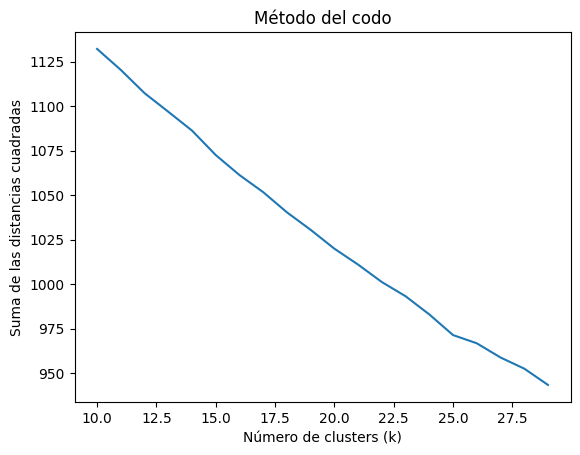

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Creamos una lista vacía para almacenar los valores de la suma de las distancias cuadradas
sse = []
min_clusters = 10
max_clusters = 30

# Evaluamos el modelo para diferentes valores de k
for k in range(min_clusters, max_clusters):
    kmeans_calc = KMeans(n_clusters=k, random_state=42)
    kmeans_calc.fit(X)
    sse.append(kmeans_calc.inertia_)

# Graficamos la curva del codo
plt.plot(range(min_clusters, max_clusters), sse)
plt.title('Método del codo')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Suma de las distancias cuadradas')
plt.show()

In [29]:
from sklearn.metrics import silhouette_score

# Evaluamos el modelo para diferentes valores de k
max = 0
kIdeal = 0
for k in range(20, 30):
    kmeans_calc = KMeans(n_clusters=k, random_state=42)
    kmeans_calc.fit(X)
    score = silhouette_score(X, kmeans_calc.labels_)
    if score > max :
      max = score
      kIdeal = k
    print("Para k=%d, el coeficiente de silueta es %0.3f" % (k, score))

print("El maximo es: ", kIdeal, " grupos, con silueta: " ,max)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=20, el coeficiente de silueta es 0.081


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=21, el coeficiente de silueta es 0.082


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=22, el coeficiente de silueta es 0.082


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=23, el coeficiente de silueta es 0.083


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=24, el coeficiente de silueta es 0.087


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=25, el coeficiente de silueta es 0.089


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=26, el coeficiente de silueta es 0.088


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=27, el coeficiente de silueta es 0.091


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=28, el coeficiente de silueta es 0.093


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=29, el coeficiente de silueta es 0.095
El maximo es:  29  grupos, con silueta:  0.094843194860435


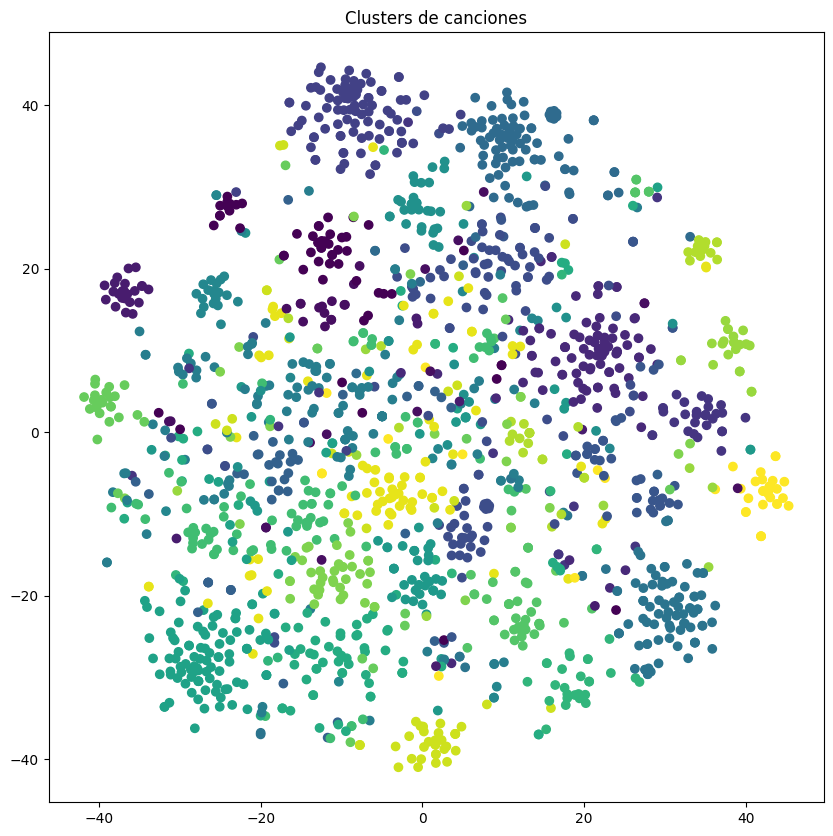

In [41]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Gráfico de puntos en el espacio reducido por t-SNE, coloreados por cluster
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap='viridis')
ax.set_title('Clusters de canciones')
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

# cargar los datos de las canciones
datos = pd.read_csv(path+'Spotify_Songs_Links_ES.csv', delimiter=';')
n_clusters = 27

# definir el pipeline de preprocesamiento y modelo
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=stop_words)),
    ('kmeans', KMeans(n_clusters=n_clusters, random_state=42))
]) 

# definir los valores para max_df y min_df que se van a probar
parameters = {
    'tfidf__max_df': (0.90, 0.95, 1.0),
    'tfidf__min_df': (0.10, 0.15, 0.20)
}

datos['lyrics'] = datos['lyrics'].str.lower()
datos['lyrics'] = datos['lyrics'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
datos['lyrics'] = datos['lyrics'].apply(clean_Text)

datos['lyrics'] = datos['lyrics'].apply(lambda x: ' '.join(
    [word for word in x.lower().split() if word not in (stop_words)]))
datos['lyrics'] = datos['lyrics'].apply(stem_text)

# realizar la búsqueda en la cuadrícula utilizando la validación cruzada
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(datos['lyrics'])

# imprimir los valores óptimos de max_df y min_df
print("Mejores parámetros: ")
print("df's óptimos:", grid_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Mejores parámetros: 
df's óptimos: {'tfidf__max_df': 0.9, 'tfidf__min_df': 0.2}
